
# Analyse de sentiment sur des critiques IMDB



In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import re
import nltk
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, auc, f1_score
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Téléchargement des stopwords NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>




# Étape 1 : Chargement et prétraitement du dataset


In [2]:


# Fonction de nettoyage de texte
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # suppression balises HTML
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # suppression ponctuation et chiffres
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Fonction de prétraitement
def preprocess(text):
    text = clean_text(text)
    tokens = text.split()
    return ' '.join([word for word in tokens if word not in stop_words])

# Chargement du dataset (5000 échantillons pour des raisons de performance)
df = pd.read_csv('/Users/r1/Desktop/Classification commentaires positifs et négatifs mémoire/IMDB Dataset.csv', nrows=5000)

# Application du prétraitement
df['clean_review'] = df['review'].apply(preprocess)

# Encodage des labels : 0 = negative, 1 = positive
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['sentiment'])



# Étape 2 : Vectorisation avec TF-IDF


In [3]:


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])
y = df['label']

# Séparation en ensemble d'entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Étape 3 : Entraînement des modèles


In [4]:

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Régression Logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)




# Étape 4 : Évaluation des modèles



📊 Évaluation - KNN
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       530
           1       0.70      0.72      0.71       470

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.73      0.72      0.73      1000

✅ Accuracy: 0.7250 | F1-score: 0.7120


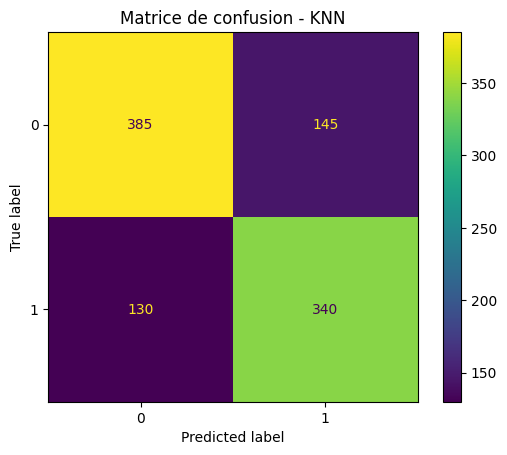


📊 Évaluation - Régression Logistique
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       530
           1       0.85      0.88      0.87       470

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

✅ Accuracy: 0.8720 | F1-score: 0.8655


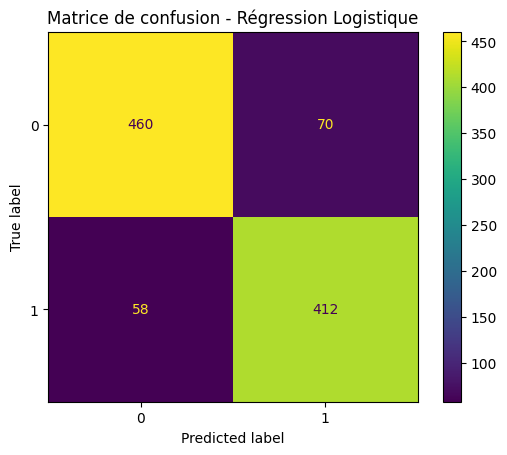

['tfidf_vectorizer.pkl']

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n Évaluation - {model_name}")
    print(classification_report(y_true, y_pred))
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f" Accuracy: {acc:.4f} | F1-score: {f1:.4f}")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matrice de confusion - {model_name}")
    plt.grid(False)
    plt.show()

# Évaluation des deux modèles
evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_logreg, "Régression Logistique")

# Sauvegarde du modèle logistique pour interface utilisateur
joblib.dump(logreg, "logreg_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

Les résultats obtenus montrent que la régression logistique offre de meilleures performances que le modèle KNN, avec une accuracy de 87,2 % et un F1-score de 86,6 %, contre 72,5 % et 71,2 % pour KNN. La matrice de confusion confirme également une meilleure capacité de la régression logistique à bien distinguer les classes. Ces résultats plus solides et constants justifient le choix de ce modèle comme solution finale pour notre tâche d’analyse de sentiment.



# Étape 5 : Interface utilisateur en console (logistic regression uniquement)


In [ ]:



def predict_comment():
    print("\n Testez votre propre commentaire (en anglais)")
    user_input = input("Entrez un commentaire : ")
    processed = preprocess(user_input)
    vect = vectorizer.transform([processed])
    prediction = logreg.predict(vect)[0]
    proba = logreg.predict_proba(vect)[0][prediction]
    sentiment = "POSITIF" if prediction == 1 else "NÉGATIF"
    print(f"\n Résultat : {sentiment} ({proba:.2%} de confiance)")

# Optionnel : activer ce bloc pour que ça s’exécute à chaque fois
#predict_comment()



 Testez votre propre commentaire (en anglais)

 Résultat : POSITIF (70.86% de confiance)
